In [1]:
import time
start = time.time()

In [14]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

In [15]:
# getting data in a pandas dataframe

dataframe = pd.read_csv('essays_and_scores.csv', encoding = 'latin-1')

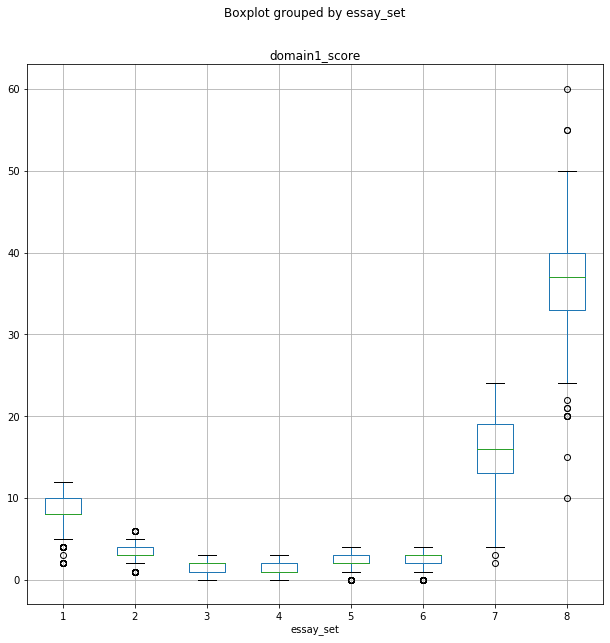

In [16]:
# Boxlot can be used to visualize the distribution of domain1_score values over each essay set.

%matplotlib inline
dataframe.boxplot(column = 'domain1_score', by = 'essay_set', figsize = (10, 10))

In [17]:
data = dataframe[['essay_set','essay','domain1_score']].copy()
data.head()

,essay_set,essay,domain1_score
0,1,"Dear local newspaper, I think effects computer...",8.0
1,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9.0
2,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7.0
3,1,"Dear Local Newspaper, @CAPS1 I have found that...",10.0
4,1,"Dear @LOCATION1, I know having computers has a...",8.0


In [18]:
def sentence_to_wordlist(raw_sentence):
    
    clean_sentence = re.sub("[^a-zA-Z0-9]"," ", raw_sentence)
    tokens = nltk.word_tokenize(clean_sentence)
    
    return tokens

In [19]:
def tokenize(essay):
    stripped_essay = essay.strip()
    
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(stripped_essay)
    
    tokenized_sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            tokenized_sentences.append(sentence_to_wordlist(raw_sentence))
    
    return tokenized_sentences

In [20]:
def avg_word_len(essay):
    
    clean_essay = re.sub(r'\W', ' ', essay)
    words = nltk.word_tokenize(clean_essay)
    
    return sum(len(word) for word in words) / len(words)

In [21]:
def word_count(essay):
    
    clean_essay = re.sub(r'\W', ' ', essay)
    words = nltk.word_tokenize(clean_essay)
    
    return len(words)

In [22]:
def char_count(essay):
    
    clean_essay = re.sub(r'\s', '', str(essay).lower())
    
    return len(clean_essay)

In [23]:
def sent_count(essay):
    
    sentences = nltk.sent_tokenize(essay)
    
    return len(sentences)

In [24]:
def count_lemmas(essay):
    
    tokenized_sentences = tokenize(essay)      
    
    lemmas = []
    wordnet_lemmatizer = WordNetLemmatizer()
    
    for sentence in tokenized_sentences:
        tagged_tokens = nltk.pos_tag(sentence) 
        
        for token_tuple in tagged_tokens:
        
            pos_tag = token_tuple[1]
        
            if pos_tag.startswith('N'): 
                pos = wordnet.NOUN
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('J'):
                pos = wordnet.ADJ
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('V'):
                pos = wordnet.VERB
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            elif pos_tag.startswith('R'):
                pos = wordnet.ADV
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
            else:
                pos = wordnet.NOUN
                lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
    
    lemma_count = len(set(lemmas))
    
    return lemma_count

In [25]:
def get_count_vectors(essays):
    
    vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
    
    count_vectors = vectorizer.fit_transform(essays)
    
    feature_names = vectorizer.get_feature_names()
    
    return feature_names, count_vectors

In [26]:
feature_names_cv, count_vectors = get_count_vectors(data[data['essay_set'] == 1]['essay'])

X_cv = count_vectors.toarray()
y_cv = data[data['essay_set'] == 1]['domain1_score'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X_cv, y_cv, test_size = 0.3)

c:\users\deepm\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [27]:
def extract_features(data):
    
    features = data.copy()
    
    features['char_count'] = features['essay'].apply(char_count)    
    features['word_count'] = features['essay'].apply(word_count)
    features['sent_count'] = features['essay'].apply(sent_count)
    features['avg_word_len'] = features['essay'].apply(avg_word_len)
    features['lemma_count'] = features['essay'].apply(count_lemmas)
    
    return features

In [29]:
import time
_start = time.time()
features_set1 = extract_features(data[data['essay_set'] == 1])
print(features_set1)
print(time.time() - _start)

      essay_set                                              essay  \
0             1  Dear local newspaper, I think effects computer...   
1             1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2             1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3             1  Dear Local Newspaper, @CAPS1 I have found that...   
4             1  Dear @LOCATION1, I know having computers has a...   
...         ...                                                ...   
1778          1  Dear @CAPS1, @CAPS2 several reasons on way I t...   
1779          1  Do a adults and kids spend to much time on the...   
1780          1  My opinion is that people should have computer...   
1781          1  Dear readers, I think that its good and bad to...   
1782          1  Dear - Local Newspaper I agree thats computers...   

      domain1_score  char_count  word_count  sent_count  avg_word_len  \
0               8.0        1538         350          16      4.237143   
1            

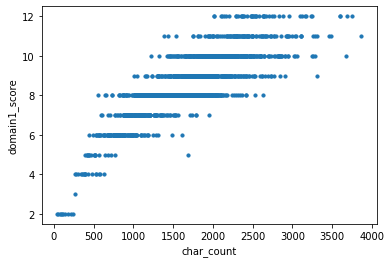

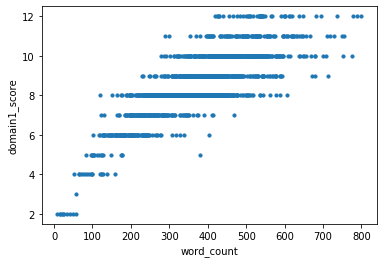

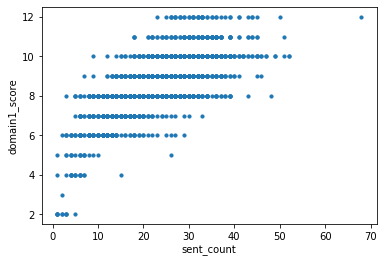

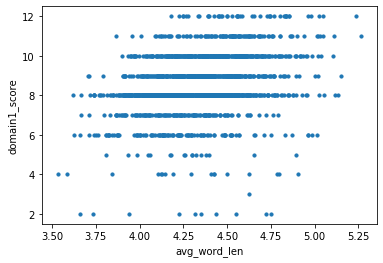

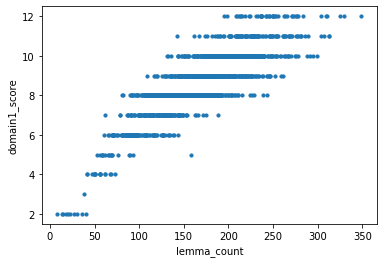

In [30]:
%matplotlib inline
features_set1.plot.scatter(x = 'char_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'word_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'sent_count', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'avg_word_len', y = 'domain1_score', s=10)
features_set1.plot.scatter(x = 'lemma_count', y = 'domain1_score', s=10)

In [32]:
X = np.concatenate((features_set1.iloc[:, 3:].as_matrix(), X_cv), axis = 1)
y = features_set1['domain1_score'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

c:\users\deepm\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\deepm\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [19]:
# Model Train

_start = time.time()
params = {'n_estimators':[100, 1000], 'max_depth':[2], 'min_samples_split': [2],
          'learning_rate':[3, 1, 0.1, 0.3], 'loss': ['ls']}

gbr = ensemble.GradientBoostingRegressor()

grid = GridSearchCV(gbr, params)
grid.fit(X_train, y_train)

import pickle
with open("Models/gradient_all.pickle", "wb") as file:
    pickle.dump(grid, file)
    
print(time.time() - _start)

c:\users\deepm\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\deepm\anaconda3\envs\tf2\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\users\deepm\anaconda3\envs\tf2\lib\site-packages\sklearn\ensemble\_gb_losses.py:212: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
c:\users\deepm\anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\regression.py:552: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
c:\users\deepm\anaconda3\envs\tf2\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dt

4666.736154794693


In [33]:
import pickle
with open('Models/gradient_all.pickle', 'rb') as file:
    model = pickle.load(file)
    
y_pred = model.predict(X_test)
    
print(model.best_score_)
print(model.best_estimator_)

mse = mean_squared_error(y_test, y_pred)
print("MSE: %.4f" % mse)

0.7367802675362963
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE: 0.4429


In [34]:
def test_custom(essay):
    global data
    data_temp = data.copy()
    
    essay = pd.DataFrame({"essay": [essay]})
    
    data.append(essay, ignore_index=True, sort=True)
    feature_names_cv, count_vectors = get_count_vectors(data[data['essay_set'] == 1]['essay'])
    
    data = data_temp.copy()
    
    X_cv = count_vectors.toarray()[-1].reshape(1, -1)

    test_features = extract_features(essay)

    test_X = np.concatenate((test_features.iloc[:, 1:].as_matrix(), X_cv), axis = 1)
    
    return model.predict(test_X)[0]

In [81]:
def hin_test_custom(essay):
    from textblob import TextBlob
    hi_blob = TextBlob(essay)
    en_blob = hi_blob.translate(from_lang='hi', to='en')
    return test_custom(str(en_blob))

In [82]:
print("\nYour essay score: ", hin_test_custom(input("Paste your essay here: ")))

Paste your essay here: """प्रिय स्थानीय समाचार पत्र @ CAPS1, @ CAPS2 हमारी प्रौद्योगिकी को आगे बढ़ाते हैं, इसलिए जीवन जीते हैं। कंप्यूटर हमारे जीवन के तरीके को बेहतर बनाने के लिए एक सही तरीका है जो हमारे और आने वाली पीढ़ियों के लिए हानिकारक हैं। कंप्यूटर का उपयोग, और @ CAPS5 अकेले हमें @ LOCATION4 पर अन्य स्थानों पर जीवन के बारे में जानने के लिए लोगों से बात करने की अनुमति देते हैं, और खुद को व्यक्त करते हैं। कंप्यूटर हमें उज्ज्वल भविष्य देते हैं। पहले कई लोग, वास्तव में दुनिया की आबादी के @ PERCENT1 आम तौर पर एक स्थानीय शहर या शहर के वातावरण में स्थिर और लाइन में हैं। यही कारण है कि कंप्यूटर इतने उपयोगी हैं क्योंकि वे @ CAPS2 को दुनिया भर के अन्य स्थानों पर शोध करने का एक तरीका देते हैं। @ CAPS3 अन्य संस्कृतियों में रुचि पैदा कर सकता है, और हमारी राय को आकार दे सकता है @ CAPS2 @ CAPS3 अन्य स्थानों के बारे में चीजों की खोज करता है। वहाँ से, @ CAPS3 विभिन्न विषयों को एक विस्तृत प्रसार बिंदु पर देख सकता है। ऐसा करने में @ CAPS3 जीवन के अन्य तरीकों से जुड़ जाएगा। @ CAPS2 दार्शनिक और कवि @

HTTPError: HTTP Error 405: Method Not Allowed

In [64]:
"""प्रिय स्थानीय समाचार पत्र @ CAPS1, @ CAPS2 हमारी प्रौद्योगिकी को आगे बढ़ाते हैं, इसलिए जीवन जीते हैं। कंप्यूटर हमारे जीवन के तरीके को बेहतर बनाने के लिए एक सही तरीका है जो हमारे और आने वाली पीढ़ियों के लिए हानिकारक हैं। कंप्यूटर का उपयोग, और @ CAPS5 अकेले हमें @ LOCATION4 पर अन्य स्थानों पर जीवन के बारे में जानने के लिए लोगों से बात करने की अनुमति देते हैं, और खुद को व्यक्त करते हैं। कंप्यूटर हमें उज्ज्वल भविष्य देते हैं। पहले कई लोग, वास्तव में दुनिया की आबादी के @ PERCENT1 आम तौर पर एक स्थानीय शहर या शहर के वातावरण में स्थिर और लाइन में हैं। यही कारण है कि कंप्यूटर इतने उपयोगी हैं क्योंकि वे @ CAPS2 को दुनिया भर के अन्य स्थानों पर शोध करने का एक तरीका देते हैं। @ CAPS3 अन्य संस्कृतियों में रुचि पैदा कर सकता है, और हमारी राय को आकार दे सकता है @ CAPS2 @ CAPS3 अन्य स्थानों के बारे में चीजों की खोज करता है। वहाँ से, @ CAPS3 विभिन्न विषयों को एक विस्तृत प्रसार बिंदु पर देख सकता है। ऐसा करने में @ CAPS3 जीवन के अन्य तरीकों से जुड़ जाएगा। @ CAPS2 दार्शनिक और कवि @ PERSON1 राज्य "@ CAPS3 दूसरों की खोज के माध्यम से अपने बारे में जानें।" @ CAPS4, कंप्यूटरों के माध्यम से @ CAPS5 का एक और विशेष रूप से उपयोगी कार्य है @ CAPS3 उन लोगों के साथ संवाद कर सकता है जो दूर रहते हैं, जब @ CAPS3 अन्यथा नहीं जा सकते। एक @ LOCATION2 अध्ययन से पता चला कि वास्तव में @ PERCENT2 का उपयोग कंप्यूटर facebook या @ CAPS9 जैसी साइटों के साथ संचार करता है। @ LOCATION3, @ PERSON3 में एक वैज्ञानिक, कहते हैं @ CAPS3 @ CAPS2 मनुष्य संचार का आनंद लेते हैं क्योंकि यह @ CAPS2 को एकता की भावना देता है। यही कारण है कि इतनी सारी कंपनियां यह महसूस कर रही हैं कि @ ORGANIZATION2, @ CAPS6, और @ ORGANIZATION1 जैसी साइट लोकप्रियता में बढ़त हासिल कर रही हैं। "और यह सच है। यह @ CAPS7, बात या ईमेल दूसरों के लिए सुखद है। कंप्यूटर के बिना, यह नहीं कर सकता है। टी संभव हो। अंत में, कंप्यूटर हमें अपने विचारों को व्यक्त करने का मौका देते हैं, जैसे पहले कभी नहीं थे। अब, सितारे केवल @ LOCATION1 में नहीं बने हैं, लेकिन अब आप @ CAPS8 या @ CAPS9 पर खुद को प्रसिद्ध कर सकते हैं। बस @ PERSH2 से पूछें। किसने आवाज निकाली और एक प्रमुख रिकॉर्ड कंपनी का ध्यान आकर्षित किया। अब, हर कोई अपना नाम जानता है और अपने संगीत को सुनता है। @ PERSON2 की तरह, अधिक चिंतित लोग अपनी राय ब्लॉगिंग करके खुद को व्यक्त कर सकते हैं। "लगभग आधे कंप्यूटर का उपयोग करते हैं।" कहते हैं @ CAPS1 से कंप्यूटर साप्ताहिक, @ PERSON4, "किसी के विचारों को बताने के लिए ब्लॉग और वीडियो का उपयोग कर रहा है।" @ CAPS3 दूसरों को समझाने के लिए @ CAPS2 @ CAPS3 करते हैं और उन जांघों की खोज करते हैं जो @ CAPS3 ने खोजी हैं। स्व-अभिव्यक्ति बहुत महत्वपूर्ण है। समाज, और यही कारण है कि कंप्यूटर का लोगों पर ऐसा प्रभाव पड़ता है। @ CAPS2 यह है स्पष्ट, कंप्यूटर लोगों और समाज पर सकारात्मक प्रभाव डालते हैं। वे हमें दूर स्थानों के बारे में जानने, दूसरों के साथ संवाद करने और अपने विचारों से हमारे आसपास की दुनिया को प्रेरित करने की अनुमति देते हैं। आने वाला कल आपका स्वागत करता है।"""



'प्रिय स्थानीय समाचार पत्र @ CAPS1, @ CAPS2 हमारी प्रौद्योगिकी को आगे बढ़ाते हैं, इसलिए जीवन जीते हैं। कंप्यूटर हमारे जीवन के तरीके को बेहतर बनाने के लिए एक सही तरीका है जो हमारे और आने वाली पीढ़ियों के लिए हानिकारक हैं। कंप्यूटर का उपयोग, और @ CAPS5 अकेले हमें @ LOCATION4 पर अन्य स्थानों पर जीवन के बारे में जानने के लिए लोगों से बात करने की अनुमति देते हैं, और खुद को व्यक्त करते हैं। कंप्यूटर हमें उज्ज्वल भविष्य देते हैं। पहले कई लोग, वास्तव में दुनिया की आबादी के @ PERCENT1 आम तौर पर एक स्थानीय शहर या शहर के वातावरण में स्थिर और लाइन में हैं। यही कारण है कि कंप्यूटर इतने उपयोगी हैं क्योंकि वे @ CAPS2 को दुनिया भर के अन्य स्थानों पर शोध करने का एक तरीका देते हैं। @ CAPS3 अन्य संस्कृतियों में रुचि पैदा कर सकता है, और हमारी राय को आकार दे सकता है @ CAPS2 @ CAPS3 अन्य स्थानों के बारे में चीजों की खोज करता है। वहाँ से, @ CAPS3 विभिन्न विषयों को एक विस्तृत प्रसार बिंदु पर देख सकता है। ऐसा करने में @ CAPS3 जीवन के अन्य तरीकों से जुड़ जाएगा। @ CAPS2 दार्शनिक और कवि @ PERSON1 राज्य "@ CAPS3 द

In [77]:
def en_to_hi(sentence):
    from textblob import TextBlob
    en_blob = TextBlob(sentence)
    hi_blob = en_blob.translate(from_lang='en', to='hi')
    return str(hi_blob)

In [84]:
hin_test_custom(en_to_hi(data["essay"][2]))

HTTPError: HTTP Error 429: Too Many Requests